In [1]:
# import libraires 
import tensorflow as tf 

# helper libraries 
from sklearn.datasets import load_iris # data set 
import numpy as np # matrix maths
from sklearn.model_selection import train_test_split # to split data set 
from sklearn.metrics import confusion_matrix # matrix evaluation 
from sklearn.preprocessing import OneHotEncoder # to encode our labels

# plotting libraries 
from seaborn import  heatmap # plotting a confustion matrix 
import matplotlib.pyplot as plt # python plotting 

In [2]:
# loading data sets 
iris_data = load_iris()
# features 
features = iris_data.data
# output 
inputY = iris_data.target
# onehot encoding of our labels 
inputY = OneHotEncoder(sparse=False).fit_transform(inputY[:,np.newaxis])

In [3]:
# hyper parameters 
learning_rate = 0.001
training_epochs = 10000

In [4]:
# splitting our data set 
X_train, X_test, y_train, y_test = train_test_split(features, inputY, random_state=0)

In [5]:
# make a computation graph 
x = tf.placeholder(tf.float32, [None, 4]) # features placeholder
W = tf.Variable(tf.zeros([4,3])) # random weights initialize 
b = tf.Variable(tf.zeros(3))  #bias initialize 
ypred = tf.add(b, tf.matmul(x, W)) # matrix multiplication 
ypred = tf.nn.softmax(ypred) # softmax conversion for logit 
y = tf.placeholder(tf.float32, [None,3]) # placeholder for labels

In [6]:
# making a cost fucntion 
cost = tf.reduce_mean(tf.square(y - ypred))
# cost optimizer 
# gradinet descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# init session and variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [8]:
# for loop
for i in range(training_epochs):
    # running optimizer
    sess.run(optimizer, feed_dict={x:X_train, y:y_train})
    # cost function printing
    if (i) % 500 == 0:
        cc = sess.run(cost,feed_dict={x:X_train, y:y_train})
        print("{} iteration cost = {}".format(i, cc))

# final parameters
print("After Optimization")
training_cost = sess.run(cost, feed_dict={x:X_train, y:y_train})
print("training cost = {}, w = {}, b = {}".format(training_cost, sess.run(W), sess.run(b)))

0 iteration cost = 0.22213107347488403
500 iteration cost = 0.2002335488796234
1000 iteration cost = 0.18551133573055267
1500 iteration cost = 0.17254625260829926
2000 iteration cost = 0.1616486757993698
2500 iteration cost = 0.15267996490001678
3000 iteration cost = 0.1453193873167038
3500 iteration cost = 0.13923504948616028
4000 iteration cost = 0.1341456174850464
4500 iteration cost = 0.1298300176858902
5000 iteration cost = 0.1261194944381714
5500 iteration cost = 0.12288618087768555
6000 iteration cost = 0.12003324180841446
6500 iteration cost = 0.11748675256967545
7000 iteration cost = 0.11518985778093338
7500 iteration cost = 0.11309840530157089
8000 iteration cost = 0.11117783188819885
8500 iteration cost = 0.10940073430538177
9000 iteration cost = 0.10774523764848709
9500 iteration cost = 0.10619369149208069
After Optimization
training cost = 0.10473457723855972, w = [[ 0.16540723  0.01660486 -0.18201157]
 [ 0.3756333  -0.1266983  -0.24893484]
 [-0.54280573  0.09975313  0.443

In [9]:
# testing our model 
pred = sess.run(ypred, feed_dict={x:X_test, y:y_test}).round()

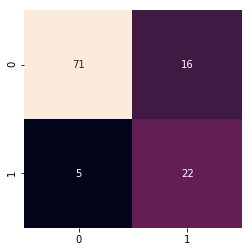

In [10]:
# confusion matrix 
mat = confusion_matrix(y_test.ravel(), pred.ravel())
# plotting heat maps 
heatmap(mat.T, square=True, fmt='d', annot=True, cbar=False)
plt.show();